https://towardsdatascience.com/machine-learning-autoencoders-712337a07c71

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # for plots

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.round(x_train, 0)
x_test = np.round(x_test, 0)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)

(60000, 784)


In [8]:
# inputs = tf.keras.layers.Input(784)
inputs = tf.keras.layers.Input((784,))
encoded_1 = tf.keras.layers.Dense(128)(inputs)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded_1)
decoded_1 = tf.keras.layers.Dense(128)(encoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded_1)
auto_encoder = tf.keras.Model(inputs, decoded)
auto_encoder.compile(loss='binary_crossentropy', 
                     optimizer='adam', 
                     metrics=['accuracy'])
auto_encoder.summary()
# tf.keras.utils.plot_model(auto_encoder, show_shapes=True, to_file='autoenc.png', dpi=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 参数重用很简单
encoder = tf.keras.Model(inputs, encoded)
encoder.summary()
# tf.keras.utils.plot_model(encoder, show_shapes=True, to_file='enc.png', dpi=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [10]:
auto_encoder.fit(x_train, x_train, 
                 epochs=10,
                 batch_size=256,
                 shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1933 - acc: 0.9128
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0946 - acc: 0.9604
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0724 - acc: 0.9706
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0613 - acc: 0.9755
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0541 - acc: 0.9786
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0495 - acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0461 - acc: 0.9820
Epoch 8/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0436 - acc: 0.9831
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0415 - acc: 0.9839
Epoch 10/10
60000/60000 [=========

In [11]:
predicted_2dim = encoder.predict(x_test)
predicted_original = auto_encoder.predict(x_test)

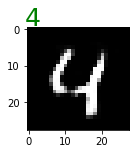

In [14]:
shown = {}
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=1, wspace=0.1)
i = 0
for data, y in zip(predicted_original, y_test):
    if y not in shown and y==len(shown):
        i += 1
        ax = fig.add_subplot(1, 10, i)
        ax.text(1, -1, str(y), fontsize=25, ha='center', c='g')
        ax.imshow(np.array(data).reshape(28, 28), cmap='gray')
    shown[y] = True
    if len(shown) == 10:
        break